In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
import re 
import string
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#listdir returns a list containing the names of the entries in the directory given as a parameter
labels = os.listdir('./dataset2') 

# tf.keras.preprocessing.text_dataset_from_directory Generates a 
# tf.data.Dataset from text files in a directory.
raw_data = tf.keras.preprocessing.text_dataset_from_directory(
    './dataset2',
    # "inferred" : the labels are generated from the directory structure
    labels = "inferred",
    # "int": the labels are encoded as integers
    label_mode = "int",
    # Maximum size of a text string. Texts longer than this will be shortened 
    # to max_length unless it's None ra7at explanation f kil zit.
    max_length = None,
    # Whether to shuffle the data. If False, sorts the data in alphanumeric order.
    shuffle=True,
    # Finally haja fahmetha mn bkri
    seed=11,
    # Optional float between 0 and 1, fraction of data to reserve for validation
    validation_split=None,
    # Only used if validation_split is set, mahich set alors sotit
    subset=None,
)

Found 430 files belonging to 5 classes.


In [3]:
print("Classes names:\n",raw_data.class_names)

Classes names:
 ['culture', 'economy', 'politics', 'science', 'tamazight']


In [4]:
type(raw_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [5]:
x=[]
y=[]
for text_batch, label_batch in raw_data:
    for i in range(len(text_batch)):
        s=text_batch.numpy()[i].decode("utf-8") 
        x.append(s)
        y.append(raw_data.class_names[label_batch.numpy()[i]])
print(len(x))
print(len(y))

430
430


In [6]:
type(x)

list

In [7]:
x[:30]

['مارسيل خليفة يتمنى "الأصل المغربي" ويتمسك بالمقاومة عبر الموسيقى \r\n\r\n بحضور الموسيقي البارز مارسيل خليفة، استقبلت أكاديمية المملكة المغربية، اليوم الخميس بالرباط، حلقة نقاش، نظمها المعهد الأكاديمي للفنون، حول أسئلة الموسيقى في حاضر المنطقة والعالم. هذه الحلقةُ النقاشية، التي أطرها مارسيل خليفة، وسيّرها باسم المعهد الأكاديمي للفنون الأكاديمي محمد نور الدين أفاية، جمعَت عددا من الأسماء البحثية والأصوات الموسيقية المغربية، التي عبرت عن آرائها في تاريخ وواقع الموسيقى، وتلقّيها، والتربية الموسيقية، وآفاق توثيق الإبداعات المغربية وتنميتها.  وقد أحدث المعهد الأكاديمي للفنون في إطار أكاديمية المملكة المغربية، برسم قانون إعادة تنظيمها رقم 74.19، وأنيطت به مهمة “تنمية الإبداع الفني والاعتناء بالفنون والتراث الفني المغربي الأصيل بكل أشكاله وتنوع مكوناته، والعمل على التعريف به والإسهام في الحفاظ عليه وتثمينه بكل السبل المتاحة”. واهتمت الكلمات بـ”الحاجة إلى حماية المتلقي من الإنتاجات غير المؤطرة علميا وتربويا”، ونفت بعضها الصحة عن “ثنائية الموسيقى العالِمة والشعبية”؛ لأن شرط العِلمية مرتبط با

In [8]:
y[:30]

['culture',
 'politics',
 'culture',
 'politics',
 'politics',
 'politics',
 'tamazight',
 'culture',
 'politics',
 'tamazight',
 'science',
 'economy',
 'science',
 'culture',
 'tamazight',
 'culture',
 'culture',
 'economy',
 'science',
 'economy',
 'culture',
 'politics',
 'science',
 'science',
 'economy',
 'tamazight',
 'science',
 'science',
 'culture',
 'science']

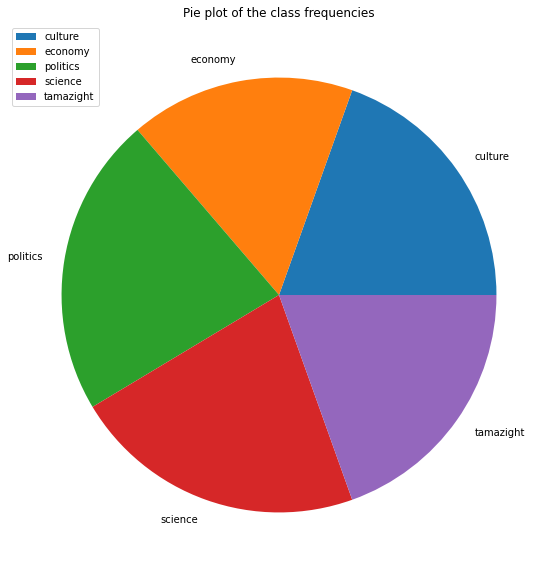

In [9]:
unique, counts = np.unique(y, return_counts=True)
plt.figure("classe Pie", figsize=(10, 10))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=labels)
plt.legend(unique)
plt.show()

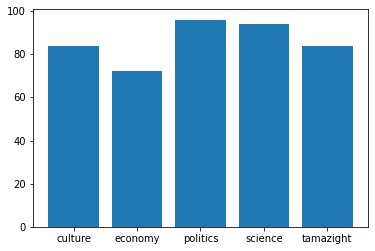

In [10]:
plt.bar( labels,counts)
plt.show();

In [11]:
data =pd.DataFrame({"text":x,"label":y}) 

In [12]:
data.head()

,text,label
0,"مارسيل خليفة يتمنى ""الأصل المغربي"" ويتمسك بالم...",culture
1,"بركة يبسط خطة الحكومة لحماية المغاربة من ""الوض...",politics
2,جامعة الحسن الثاني تثمن تراث الشاوية \r\n\r\n ...,culture
3,"المعارضة ترفض ""احتقار البرلمان"" .. ومسؤول حكوم...",politics
4,الحكومة تتدارس أربعة مشاريع مراسيم \r\n\r\n ين...,politics


In [13]:
data.to_csv('file1.csv')

In [14]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    430 non-null    object
 1   label   430 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [16]:
data.shape

(430, 2)

In [17]:
data.duplicated().sum()

0

In [18]:
data['label'].value_counts()

politics     96
science      94
culture      84
tamazight    84
economy      72
Name: label, dtype: int64

In [19]:
category = data['label'].unique()
print(category)

['culture' 'politics' 'tamazight' 'science' 'economy']


In [20]:
data['labelId'] = data['label'].factorize()[0]
data.head()

,text,label,labelId
0,"مارسيل خليفة يتمنى ""الأصل المغربي"" ويتمسك بالم...",culture,0
1,"بركة يبسط خطة الحكومة لحماية المغاربة من ""الوض...",politics,1
2,جامعة الحسن الثاني تثمن تراث الشاوية \r\n\r\n ...,culture,0
3,"المعارضة ترفض ""احتقار البرلمان"" .. ومسؤول حكوم...",politics,1
4,الحكومة تتدارس أربعة مشاريع مراسيم \r\n\r\n ين...,politics,1


In [21]:
category = data[['label', 'labelId']].drop_duplicates().sort_values('labelId')
category

,label,labelId
0,culture,0
1,politics,1
6,tamazight,2
10,science,3
11,economy,4


In [22]:
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'هَجْ', 'أف', 'أسكن', 'قد', 'هؤلاء', 'منه', 'ثلاث', 'هاتين', 'يناير', 'ميم', 'أيّان', 'أربع', 'خامس', 'آي', 'بين', 'دونك', 'ذوا', 'ذلكن', 'كذا', 'يونيو', 'أل', 'تفعلين', 'آناء', 'في', 'ص', 'بسّ', 'خلافا', 'هبّ', 'ذه', 'بهن', 'أنا', 'مما', 'فيم', 'عل', 'سبت', 'ها', 'تعسا', 'خاء', 'هنالك', 'ذَيْنِ', 'كرب', 'أنّى', 'هو', 'بئس', 'فإن', 'تانِك', 'إذما', 'كلما', 'أوشك', 'سبع', 'اللذان', 'رابع', 'أيّ', 'هذان', 'فيما', 'جعل', 'أعطى', 'معاذ', 'سرا', 'فضلا', 'فبراير', 'أقبل', 'و', 'ترك', 'أصلا', 'تحوّل', 'حيثما', 'متى', 'يفعلان', 'ش', 'الألاء', 'إلَيْكَ', 'لا سيما', 'ز', 'ث', 'ذانِ', 'طاء', 'هَاتِه', 'خمسمئة', 'هَاتَيْنِ', 'حرى', 'آنفا', 'هللة', 'انبرى', 'كأنما', 'أ', 'ما برح', 'تجاه', 'منذ', 'وإذ', 'بَلْهَ', 'سبعة', 'أربعة', 'خمسة', 'ولا', 'حَذارِ', 'ذيت', 'كاد', 'أولئك', 'عند', 'خلف', 'حتى', 'غين', 'والذي', 'غالبا', 'بك', 'ين', 'كأنّ', 'كسا', 'ر', 'الذي', 'بل', 'هَذِي', 'قبل', 'عما', 'هَاتِي', 'هل', 'بنا', 'أنى', 'هيهات', 'ابتدأ', 'نيف', 'كلَّا', 'مساء', 'حدَث', 'نعم', 'حجا', 'ذهب', 'ألا', 'م

In [23]:
import re
import string
import sys
import argparse

In [24]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [25]:
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk import word_tokenize

stop_words = set(stopwords.words('arabic'))
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text

def remove_stopwords(text):
  stop_words = set(stopwords.words('arabic'))
  stop_words.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه ','وفي ','ذلك', 'بأن','سيكون'})
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def stem_word(text):
  st = ISRIStemmer()
  return " ".join([st.stem(word) for word in text])

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = remove_emoji(text)
    text = remove_tags(text)
    text = remove_stopwords(text)
    text = remove_diacritics(text)
    tokens = word_tokenize(text)
    text = stem_word(text)
    text = ' '.join([word for word in tokens])
    return text

In [26]:
data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'][1]

"[ 'بركة ' , 'يبسط ' , 'خطة ' , 'الحكومة ' , 'لحماية ' , 'المغاربة ' , 'الوضعية ' , 'المائية ' , 'المقلقة ' , 'أكد ' , 'نزار ' , 'بركة، ' , 'وزير ' , 'التجهيز ' , 'والماء، ' , 'الوضع ' , 'المائي ' , 'المغرب ' , 'مقلق؛ ' , 'وجاء ' , 'أجوبته ' , 'أسئلة ' , 'الفرق ' , 'البرلمانية، ' , 'اليوم ' , 'الاثنين، ' , 'مجلس ' , 'النواب ' , 'وقال ' , 'بركة ' , ' “ ' , 'الوضعية ' , 'المائية ' , 'مقلقة ' , 'لعدة ' , 'اعتبارات، ' , 'بينها ' , 'المغرب ' , 'مهدد ' , 'بندرة ' , 'المياه ' , 'وسنوات ' , 'الجفاف ' , 'الشأن ' , 'بالنسبة ' , 'السنة، ' , 'انعكاسات ' , 'كبيرة ' , 'الساكنة ' , ' ” ' , 'وسجل ' , 'الواردات ' , 'المائية ' , 'تراجعت ' , 'بنسبة ' , '84 ' , 'المائة ' , 'مقارنة ' , 'بسنة ' , 'عادية، ' , 'بفضل ' , 'التساقطات ' , 'الأخيرة ' , 'تراجعت ' , '45 ' , 'المائة، ' , 'مشيرا ' , 'تراجع ' , 'الواردات ' , 'المائية ' , 'انطلق ' , 'سنة ' , '2018 ' , 'وأوضح ' , 'ارتفاع ' , 'متوسط ' , 'درجة ' , 'الحرارة ' , 'بدرجة ' , 'السنوات ' , 'الخمس ' , 'الأخيرة ' , 'يؤدي ' , 'تبخر ' , 'المياه ' , 'ويتسبب ' , 'إشكا

In [27]:
data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'][4]

"[ 'الحكومة ' , 'تتدارس ' , 'مشاريع ' , 'مراسيم ' , 'ينعقد ' , 'يوم ' , 'الخميس ' , 'المقبل، ' , 'مجلس ' , 'للحكومة ' , 'برئاسة ' , 'عزيز ' , 'أخنوش، ' , 'رئيس ' , 'الحكومة ' , 'وذكر ' , 'بلاغ ' , 'لرئاسة ' , 'الحكومة ' , 'المجلس ' , 'سيتدارس ' , 'بداية ' , 'أشغاله ' , 'مشاريع ' , 'مراسيم، ' , 'يتعلق ' , 'الأول ' , 'بتمديد ' , 'مدة ' , 'سريان ' , 'مفعول ' , 'حالة ' , 'الطوارئ ' , 'الصحية ' , 'بسائر ' , 'أرجاء ' , 'التراب ' , 'الوطني ' , 'لمواجهة ' , 'تفشي ' , 'فيروس ' , 'كورونا ' , 'كوفيد ' , '19، ' , 'والثاني ' , 'بتطبيق ' , 'القانون ' , 'المتعلق ' , 'بنظام ' , 'التأمين ' , 'الإجباري ' , 'الأساسي ' , 'المرض ' , 'والقانون ' , 'المتعلق ' , 'بإحداث ' , 'نظام ' , 'للمعاشات، ' , 'الخاصين ' , 'بفئات ' , 'المهنيين ' , 'والعمال ' , 'المستقلين ' , 'والأشخاص ' , 'الأجراء ' , 'يزاولون ' , 'نشاطا ' , 'خاصا، ' , 'يتعلق ' , 'بأرباب ' , 'قوارب ' , 'الصيد ' , 'التقليدي ' , 'الخاضعين ' , 'منهم ' , 'لنظام ' , 'الضمان ' , 'الاجتماعي ' , 'ويتعلق ' , 'مشروع ' , 'المرسوم ' , 'الثالث ' , 'بتغيير ' , 'وتتميم

In [28]:
List = []
for row in data.itertuples():
   List.append(re.sub(r'[\W\s]', ' ', row.text))

In [29]:
data['full text'] = List

In [30]:
data.head()

,text,label,labelId,cleaned_text,full text
0,"مارسيل خليفة يتمنى ""الأصل المغربي"" ويتمسك بالم...",culture,0,"[ 'مارسيل ' , 'خليفة ' , 'يتمنى ' , 'الأصل ' ,...",مارسيل خليفة يتمنى الأصل المغربي ويتمسك بالم...
1,"بركة يبسط خطة الحكومة لحماية المغاربة من ""الوض...",politics,1,"[ 'بركة ' , 'يبسط ' , 'خطة ' , 'الحكومة ' , 'ل...",بركة يبسط خطة الحكومة لحماية المغاربة من الوض...
2,جامعة الحسن الثاني تثمن تراث الشاوية \r\n\r\n ...,culture,0,"[ 'جامعة ' , 'الحسن ' , 'الثاني ' , 'تثمن ' , ...",جامعة الحسن الثاني تثمن تراث الشاوية نظم ...
3,"المعارضة ترفض ""احتقار البرلمان"" .. ومسؤول حكوم...",politics,1,"[ 'المعارضة ' , 'ترفض ' , 'احتقار ' , 'البرلما...",المعارضة ترفض احتقار البرلمان ومسؤول حكوم...
4,الحكومة تتدارس أربعة مشاريع مراسيم \r\n\r\n ين...,politics,1,"[ 'الحكومة ' , 'تتدارس ' , 'مشاريع ' , 'مراسيم...",الحكومة تتدارس أربعة مشاريع مراسيم ينعقد ...


Politics related words:


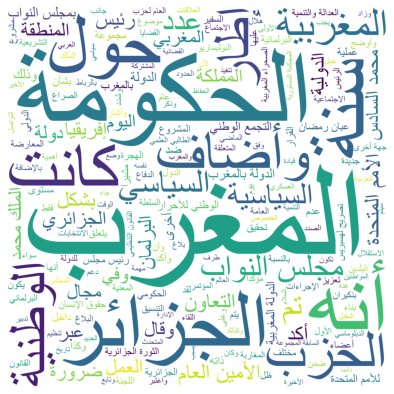

Culture related words:


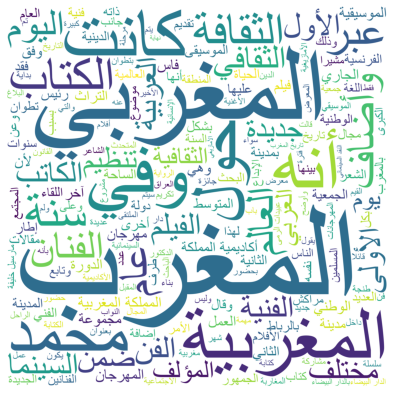

Tamazight related words:


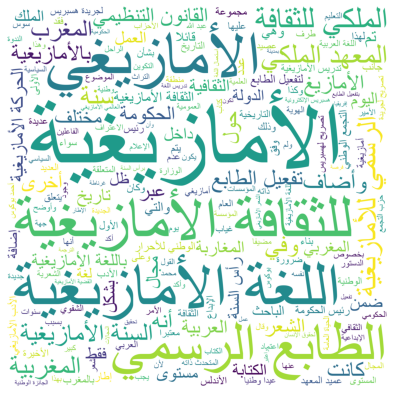

Science related words:


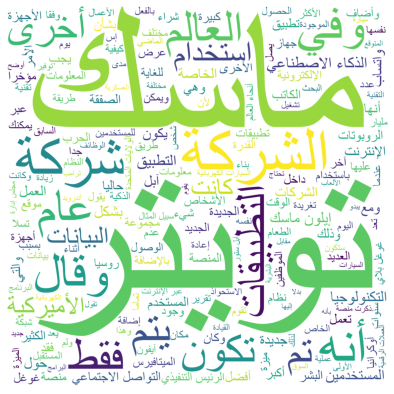

Economy related words:


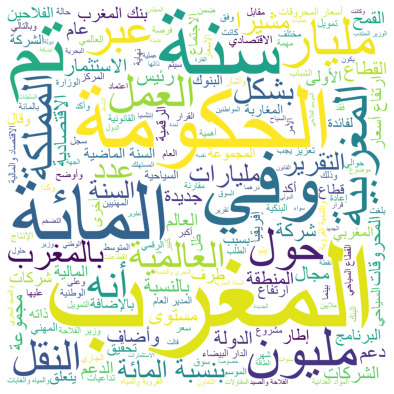

In [36]:

stop = set(stopwords.words('arabic'))

Politics = data[data['labelId'] == 1]

Politics = Politics['cleaned_text']

Culture = data[data['labelId'] == 0]

Culture = Culture['cleaned_text']

Tamazight = data[data['labelId'] == 2]

Tamazight = Tamazight['cleaned_text']

Science = data[data['labelId'] == 3]

Science = Science['cleaned_text']

Economy = data[data['labelId'] == 4]

Economy = Economy['cleaned_text']


def wordcloud_draw(data, color = 'white'):
  words = ' '.join(data)
  cleaned_word = ' '.join([word for word in words.split() ])
  wordcloud = WordCloud(font_path='arial',stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("Politics related words:")
wordcloud_draw(Politics, 'white')

print("Culture related words:")
wordcloud_draw(Culture, 'white')

print("Tamazight related words:")
wordcloud_draw(Tamazight, 'white')

print("Science related words:")
wordcloud_draw(Science, 'white')

print("Economy related words:")
wordcloud_draw(Economy, 'white')


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(data.iloc[:,0].values)
y = np.array(data.labelId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(data.cleaned_text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (430, 5000)
y.shape =  (430,)


In [41]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


print(len(x_train))
print(len(x_test))

301
129


In [43]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

3   0.7513867153259711
4   1.1936246359810663
5   1.4081942890316328
6   1.1711214082285617


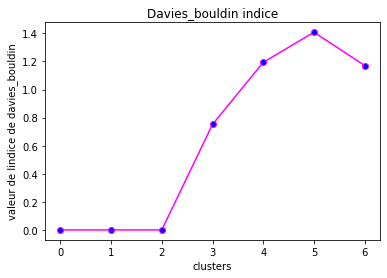

In [64]:
l=[0,0,0]
for n in range(3,7):
 kmean = KMeans(n_clusters= n )
 kmean.fit(x_train)
 result = kmean.labels_
 print(n , ' ' , davies_bouldin_score(x_train , result))
 l.append(davies_bouldin_score(x_train , result))
plt.plot(l, color='magenta', marker='o',mfc='blue' )

plt.title('Davies_bouldin indice')
plt.ylabel('valeur de lindice de davies_bouldin')
plt.xlabel('clusters')
plt.show()